### 1. Importing libraries and sh#t.

Don't know how to create a book that opens and closes cause I'm noob like that

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn import metrics

### 2. These are the the data sets.

In [2]:
train = pd.read_csv('train.csv') #1 - 1460

test = pd.read_csv('test.csv') #1461 - 2919

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 3. Data exploration

### 3.1 Squared Correlation of everything to sales price to see what matters in life

In [4]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[:20] #Overqual, Garage and Area are important. 
                                                                #Multiasdsafadfs-rity is present though (garage cars/area)

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
GarageYrBlt     0.236548
MasVnrArea      0.228000
Fireplaces      0.218023
BsmtFinSF1      0.149320
LotFrontage     0.123763
WoodDeckSF      0.105244
2ndFlrSF        0.101974
OpenPorchSF     0.099765
HalfBath        0.080717
Name: SalePrice, dtype: float64

### 3.2 Plotting sales price to see if it's normally distributed + outliers

Plainly stealing a graph, no idea who or why he did this, but it looks pretty, supposedly helps with the data

In [5]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

### 3.2.1 Data isn't normally distributed and there are outlier, oh no ... what are we going to do?

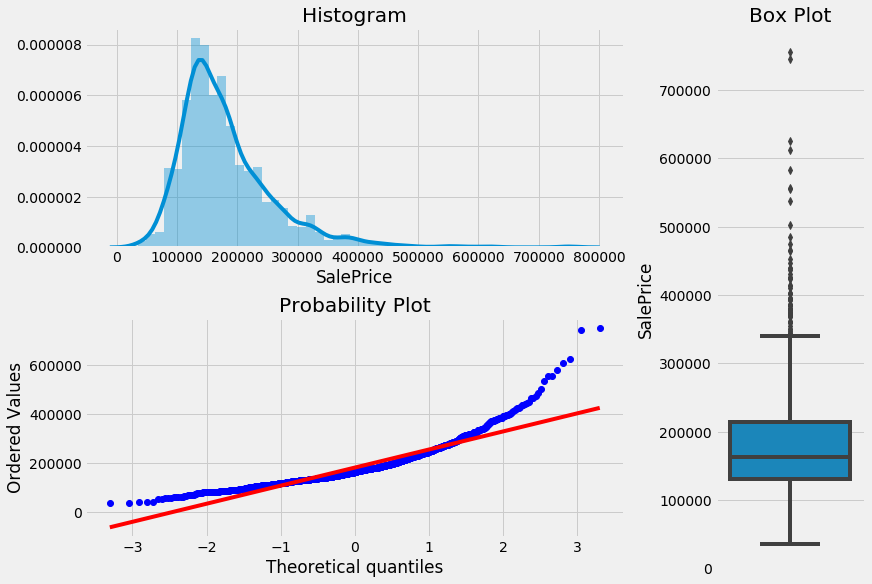

In [6]:
plotting_3_chart(train, 'SalePrice') #uses the dataset + target 

### 3.2.2 Somebody once told me the world is gonna roll me, we need a normal distribution 

In [46]:
train["SalePrice"] = np.log1p(train["SalePrice"]) #logarithms to normalize, because Emil did it and it looked good/cool


### 3.2.3 Same graph but different, but still the same ... but Log 

Data is normally distributed, yay!

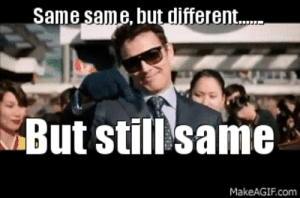

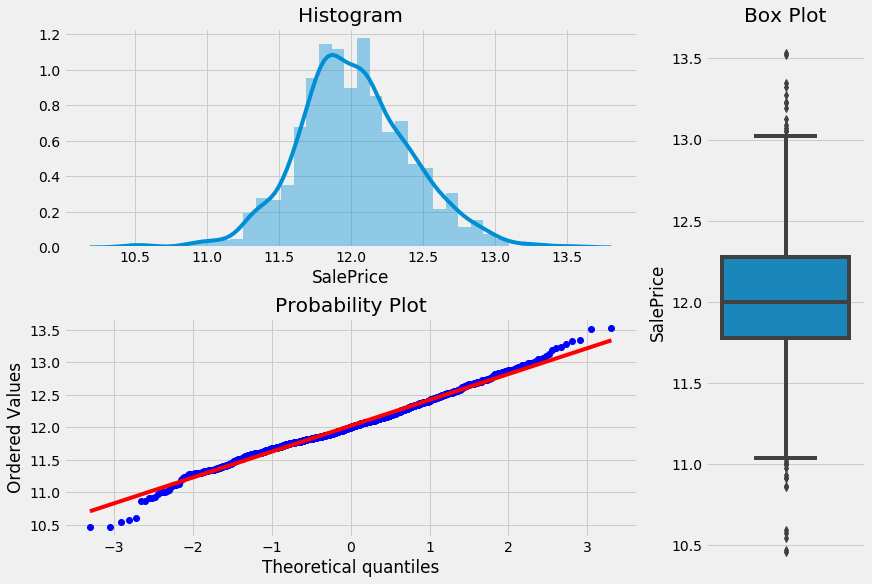

In [8]:
plotting_3_chart(train, 'SalePrice')

### 4. Data prep

Why split data into train/test later, when we can combine it. Hell yeah!!!

In [9]:
all_data = pd.concat((train, test)).reset_index(drop = True)

### 4.1 Removing the target variable in order to focus on the features

Supossedly train["SalePrice"] should keep the sale price intact to forecast? Let's hope. #noideawhatimdoing

In [10]:
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [47]:
all_data.head() #le data visualization?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,TotalSQFT,Yearbuilt/remodelled,BSMT,TotalBathrooms,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,RL,65.0,8450,Pave,None,4,Lvl,3,...,Normal,2566.0,20032003,1710,4.0,0,1,1,1,0
1,2,20,RL,80.0,9600,Pave,None,4,Lvl,3,...,Normal,2524.0,19761976,1262,3.0,0,0,1,1,1
2,3,60,RL,68.0,11250,Pave,None,3,Lvl,3,...,Normal,2706.0,20012002,1786,4.0,0,1,1,1,1
3,4,70,RL,60.0,9550,Pave,None,3,Lvl,3,...,Abnorml,2473.0,19151970,1717,2.0,0,1,1,1,1
4,5,60,RL,84.0,14260,Pave,None,3,Lvl,3,...,Normal,3343.0,20002000,2198,4.0,0,1,1,1,1


### 4.2 Data prep - dealing with NAs

In some of the features we have NA as none - they aren't missing really missing, the house just doesn't have this feature 

In [48]:
NA_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
              'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'MSZoning']
              
                 

for i in NA_as_none:
    all_data[i] = all_data[i].fillna('None') #no vectorization my ass ...

In [49]:
all_data #let's see the result ... ah yeah some NA are now None ... great success

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,TotalSQFT,Yearbuilt/remodelled,BSMT,TotalBathrooms,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,RL,65.0,8450,Pave,None,4,Lvl,3,...,Normal,2566.0,20032003,1710,4.0,0,1,1,1,0
1,2,20,RL,80.0,9600,Pave,None,4,Lvl,3,...,Normal,2524.0,19761976,1262,3.0,0,0,1,1,1
2,3,60,RL,68.0,11250,Pave,None,3,Lvl,3,...,Normal,2706.0,20012002,1786,4.0,0,1,1,1,1
3,4,70,RL,60.0,9550,Pave,None,3,Lvl,3,...,Abnorml,2473.0,19151970,1717,2.0,0,1,1,1,1
4,5,60,RL,84.0,14260,Pave,None,3,Lvl,3,...,Normal,3343.0,20002000,2198,4.0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,4,Lvl,3,...,Normal,1638.0,19701970,1092,2.0,0,1,0,1,0
2915,2916,160,RM,21.0,1894,Pave,None,4,Lvl,3,...,Abnorml,1638.0,19701970,1092,2.0,0,1,1,1,0
2916,2917,20,RL,160.0,20000,Pave,None,4,Lvl,3,...,Abnorml,2448.0,19601996,1224,2.0,0,0,1,1,1
2917,2918,85,RL,62.0,10441,Pave,None,4,Lvl,3,...,Normal,1882.0,19921992,970,2.0,0,0,0,1,0


### 4.3 Data cleaning 

Some features consist of numbers that are actually categories so we'll convert to str so they get binarized later

In [14]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

### 4.3.1 Stealing a function for missing values

Visualising the amount of missing data + the type

In [15]:
def missing_percentage(df):
    
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, percent, data_type], axis=1, keys=['Total','Percent','Type'])

missing_percentage(all_data)

,Total,Percent,Type
LotFrontage,486,16.65,float64
MasVnrArea,23,0.79,float64
Functional,2,0.07,object
BsmtHalfBath,2,0.07,float64
BsmtFullBath,2,0.07,float64
Utilities,2,0.07,object
KitchenQual,1,0.03,object
Exterior1st,1,0.03,object
Exterior2nd,1,0.03,object
GarageCars,1,0.03,float64


### 4.3.2 Data cleaning of missing values, through either Mode, 0 or as per description

There are ordinal scales which will be converted to numbers( Excellent - Good - Poor is 3-2-1)

In [54]:
#removing duplicates from lists cause I don't know how
def Dup(x):
  return list(dict.fromkeys(x))

#uhhhhhh ... creating strings from column names cause I did some stupid transformations
def addS(z):
    z = "'" + str(z) + "'"
    return z

#i was too noob to figure out how to do this so I wrote a function #novectorization
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

#went through the columns manually
columns_2_order = ['LotShape', 'Utilities', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual'
                  , 'GarageCond', 'PoolQC', 'Fence']

#noob funciton to convert ordinal categorical features to scales
for c_order in columns_2_order:
    n = len(Dup(all_data[c_order]))
    sample_dic = {}
    vlist = []
    nlist = []
    
    for val in Dup(all_data[c_order]):
        vlist.append(val)
        nlist.append(n)
        n-=1
        
    sample_dic = dict(zip(vlist, nlist))
    
    all_data[c_order] = all_data[c_order].map(sample_dic) 


### 4.3.3 Actual data cleaning

In [17]:
all_data['Functional'] = all_data['Functional'].fillna('Typical')  #Functional: Home functionality (Assume typical unless deductions are warranted)
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(0) #if data ismissing, there is none ... I guess
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')  #default values
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['SaleType'] = all_data['SaleType'].fillna("Oth")
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr') #default values
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])  #filling with mode
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['BsmtFinSF1'].fillna(all_data['Exterior2nd'].mode()[0])

No missing data - yay!!!

In [18]:
missing_percentage(all_data)

,Total,Percent,Type


### 5.0 Feature selection, no method used here - just common sence #domain knowldege

In [55]:
all_data['TotalSQFT'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] 
#basement + floor 1 + floor 2

all_data['Yearbuilt/remodelled'] = (all_data['YearBuilt'] + all_data['YearRemodAdd']) 

#these are str values, so this is effecitvely concatenating them and creatig like a bajilion dummies later

all_data['BSMT'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] 

#1st + 2nd floor ... named basement cause life is confusing

all_data['TotalBathrooms'] = (all_data['FullBath'] + (all_data['HalfBath']) + all_data['BsmtFullBath'] + (all_data['BsmtHalfBath']))

#total bathrooms

### 5.1 Literally dummie columns of the house - does it have pool, 2nd floor, garage, basement and fireplace

Supposedly this eliminates multiasdadasd-rity

In [20]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### 5.2 Let's get dummies from categorical columns

In [56]:
final_features = pd.get_dummies(all_data).reset_index(drop=True)

In [22]:
# del final_features['Id']
final_features.drop(['Id'], axis = 1, inplace = True)
final_features

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Yearbuilt/remodelled_20052007,Yearbuilt/remodelled_20062006,Yearbuilt/remodelled_20062007,Yearbuilt/remodelled_20072007,Yearbuilt/remodelled_20072008,Yearbuilt/remodelled_20082008,Yearbuilt/remodelled_20082009,Yearbuilt/remodelled_20092009,Yearbuilt/remodelled_20092010,Yearbuilt/remodelled_20102010
0,65.0,8450,4,3,3,196.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,4,3,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,3,3,3,162.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,3,3,3,0.0,3,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,3,3,3,350.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2915,21.0,1894,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2916,160.0,20000,4,3,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2917,62.0,10441,4,3,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0


### 5.2.1 Spliting the data in two for Test/Train purposes

In [23]:
X = final_features[:1460]

X_test = final_features[1460:]

y = pd.DataFrame(data =train["SalePrice"]) #needs to be a shape apperantly, same number of rows



### 5.3 PCA

[stolen text]

It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. Therefore, PCA can be considered as an unsupervised machine learning technique.
Performing PCA using Scikit-Learn is a two-step process:
Initialize the PCA class by passing the number of components to the constructor.
Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.
Take a look at the following code:

### Also ... literally stealing this piece of code:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #this is a requirement for pca .. otherwise it breaks
X = sc.fit_transform(X)

### Checking the curve on the explained variance we have around 250 components that explain most (~80%) of the variance 

### So we're gna Paretto this bitch

In [25]:
pca_com = 250 
pca = PCA(n_components=1213) #978
X = pca.fit_transform(X)
# X_test = pca.transform(X_test)

In [59]:
explained_variance = pca.explained_variance_ratio_ #X_train #explained varience is pretty self explanotory

### 5.3.1 PCA insights

I'm so fucking happy, this actually worked - finally got this hell sent analysis to work!!!

Around 250 variable is what we need

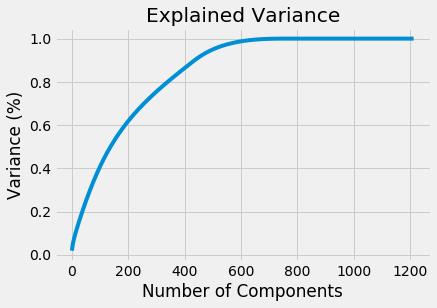

In [28]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

### 5.3.2 PCA results

Around 250 components make 80% of the variance, so Paretto bitch!!!! , I'll be taking the 250 components (aside from ID) 
that have the highest quadratic variance and dropping literally everything else

The following code literally says, order the columns by their variance and take the first 250

In [29]:
Var_matrix =(pd.concat([pd.DataFrame(list(final_features.columns), columns=["Factors"] )
           ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )]
          , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])
 
list(Var_matrix['Factors'])
X_new = final_features[list(Var_matrix['Factors'])]
X_train = X_new[:1460] #respliting data
X_test = X_new[1460:] #respliting data

### 6.0 Linear regression

Why linear regression you might ask? Cause I understand what it does and wanted to understand what I'm doing overall. Literally the worst thing I could have used.

Linear regress me daddy, hard!!!

again ... stealing this

### Let's build the regression 

In [60]:
#this is literally the linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y) #fits the models

LinearRegression()

In [61]:
r_sq = model.score(X_train, y)
print('coefficient of determination:', r_sq) #R squared to see how the model does, not great, not terrible

coefficient of determination: 0.9253920886155392


In [62]:
print('intercept:', model.intercept_) #the intercept is positive, so no house should have - price... yay!!

intercept: [7.91437411]


### Let's do predict the rain values

In [36]:
 y_pred = model.predict(X_train)

In [37]:
y_pred,y 
Pred = pd.DataFrame(y_pred, columns=['SalePrice'])
df1 = pd.concat([y, Pred], axis=1)

In [63]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE) cause kaggle uses it - who names a website kaggle srsly

def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

### 6.1. Model evaluation 

Let's see how the model did:

Mean Absolute Error: 0.0754751244634781
Mean Squared Error: 0.011896263885680172
Root Mean Squared Error: 0.1090699953501428
Root Mean Squared Logarithmic Error: 0.1090699953501428

Sounds promising

In [39]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.0754751244634781
Mean Squared Error: 0.011896263885680172
Root Mean Squared Error: 0.1090699953501428
Root Mean Squared Logarithmic Error: 0.1090699953501428


### 6.2. Predicted vs actuall value predictions

Le graph I stole shows that the model isn't really great at the very cheap / expensive houses ... so it can't forecast great values that are somewhat asymethric... I can live with that

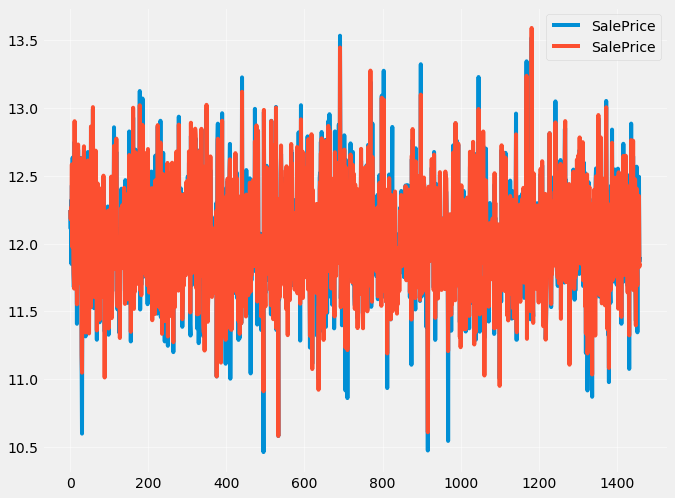

In [40]:
df1.plot(kind='line',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Predicting the test values

In [41]:
y_pred_test = model.predict(X_test)

### Exponential is the reverse of log according to the little statistics I know / internet tells me

Reversing the values so that I can submit the file

In [65]:
Regresult = np.expm1(y_pred_test) 
#creating a data frame for the export file with saleprice and ID
Regresult = pd.DataFrame(Regresult, columns=['SalePrice']) 
test["Id"].shape, Regresult.shape
test_t = pd.DataFrame(test["Id"])

### 7.0 Output and submission

The model is pretty trash garbage but it's mine and I did most of it (except all the code I stole) so I'm happy with it

In [44]:
my_submission = pd.concat([test_t, Regresult ], axis=1)

# you could use any filename. We choose submission here

my_submission.to_csv('submission.csv', index=False)

In [45]:
my_submission

,Id,SalePrice
0,1461,123410.982722
1,1462,151718.587582
2,1463,174592.057018
3,1464,198625.219274
4,1465,216050.041026
...,...,...
1454,2915,84410.461247
1455,2916,89031.008415
1456,2917,179958.049320
1457,2918,117613.896280


### 7.1 Submitting to kaggle

I made the 3160 place out of 5k people. I'm better than 1 of 3 people on average that tried to solve this case. 

Honestly ... kinda proud of myself ... this was a trip and a journey and I'm gna regress the shit out of some data at work.

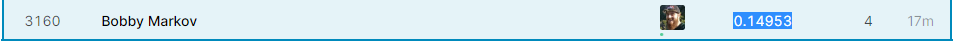.